<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
sat_filepath = '/Users/medhimugnier/Desktop/DSI-SF-4/datasets/state_sat_scores/sat_scores.csv'

In [4]:

with open(sat_filepath, 'r') as f:
    the_data = [row.strip().split(',') for row in f]
sat_dict = {row[0]:row[1:] for row in zip(*the_data)}
print sat_dict


{'Math': ('510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'), 'State': ('CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'), 'Rate': ('82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# inputting dictionary
df2 = pd.DataFrame.from_dict(sat_dict)
#df

df2.dtypes


Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [6]:
# loading directly from file

df = pd.read_csv('/Users/medhimugnier/Desktop/DSI-SF-4/datasets/state_sat_scores/sat_scores.csv')
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
# printing the first 10 rows of the DataFrame
df.head(10)

# The data appears to be the SAT grades per state in Mathematics and Verbal, with a ranking on States.





,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

Variable | Type | Description | Shape
--- | --- | --- | ---
State | object | US state | (52,1)
--- | --- | --- | ---
Rate | int64 | US state ranking depending on avg student scores | (52,1)
--- | --- | --- | ---
Verbal | int64 | grade in subject "Verbal" | (52,1)
--- | --- | --- | ---
Math | int64 | grade in subject "Math" | (52,1)
--- | --- | --- | ---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

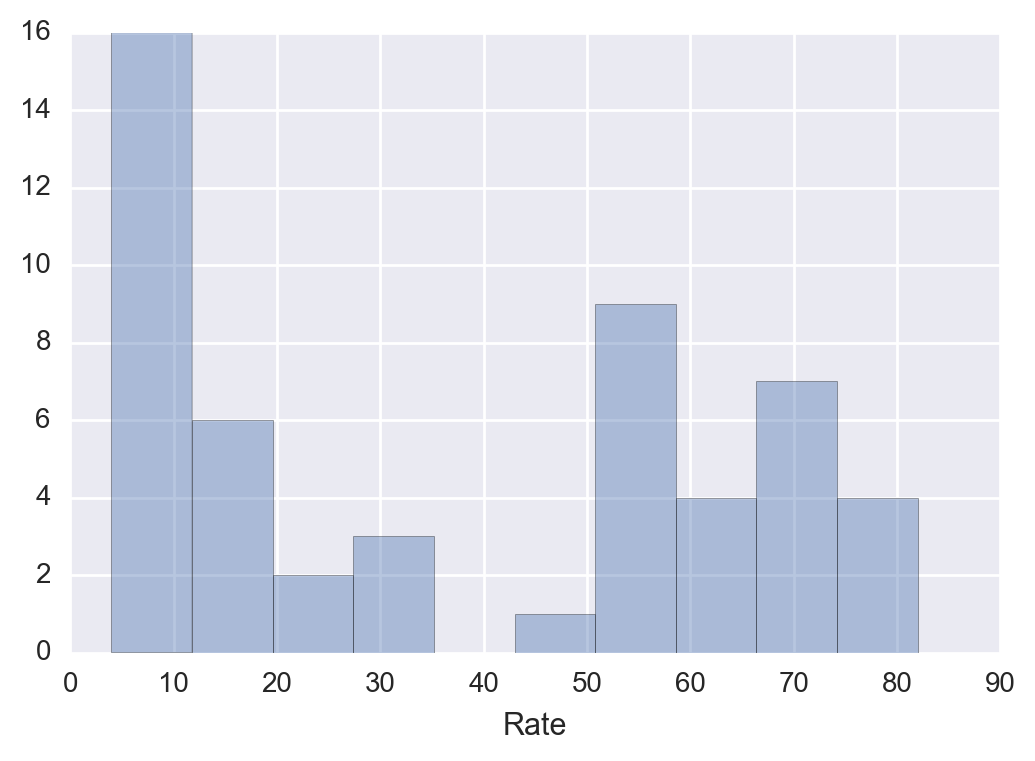

In [8]:
rate_plot = sns.distplot(df['Rate'],bins = 10 ,kde=False)


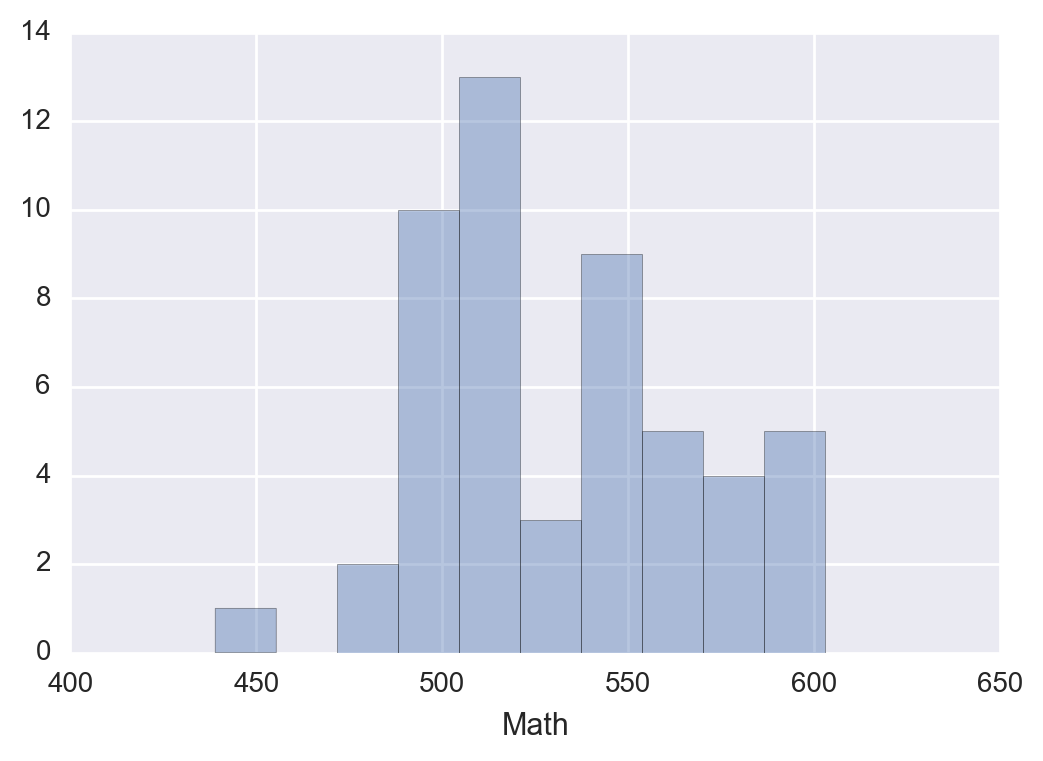

In [9]:
Math_plot = sns.distplot(df['Math'],bins = 10 ,kde=False)

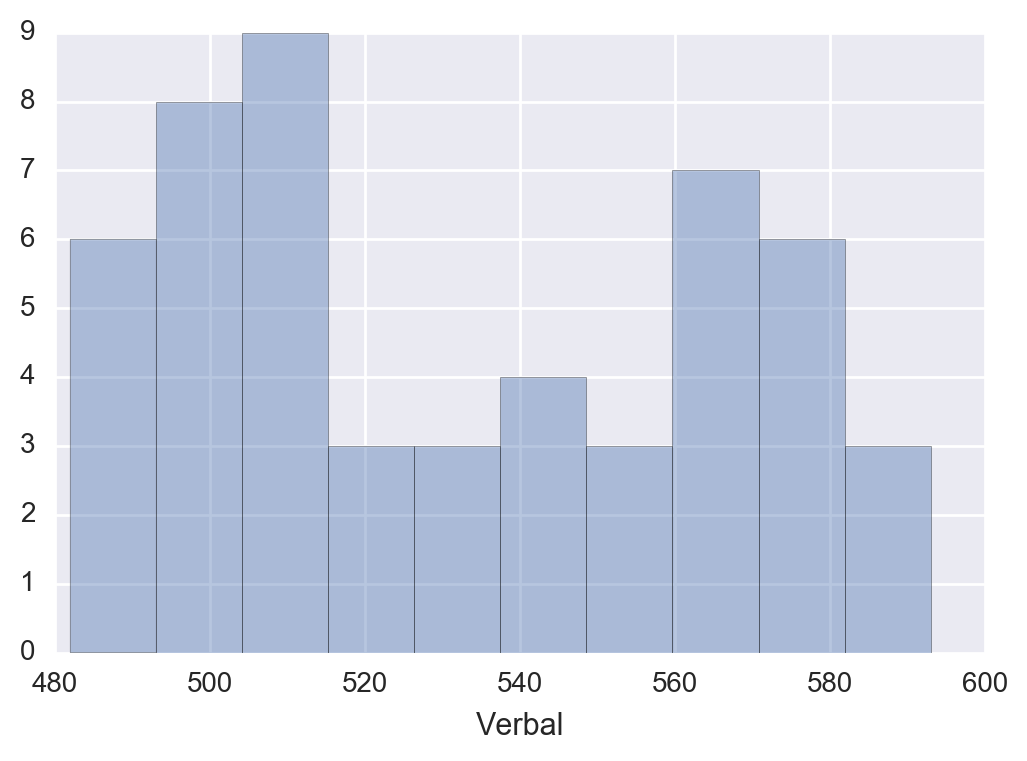

In [10]:
Verbal = sns.distplot(df['Verbal'],bins = 10 ,kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

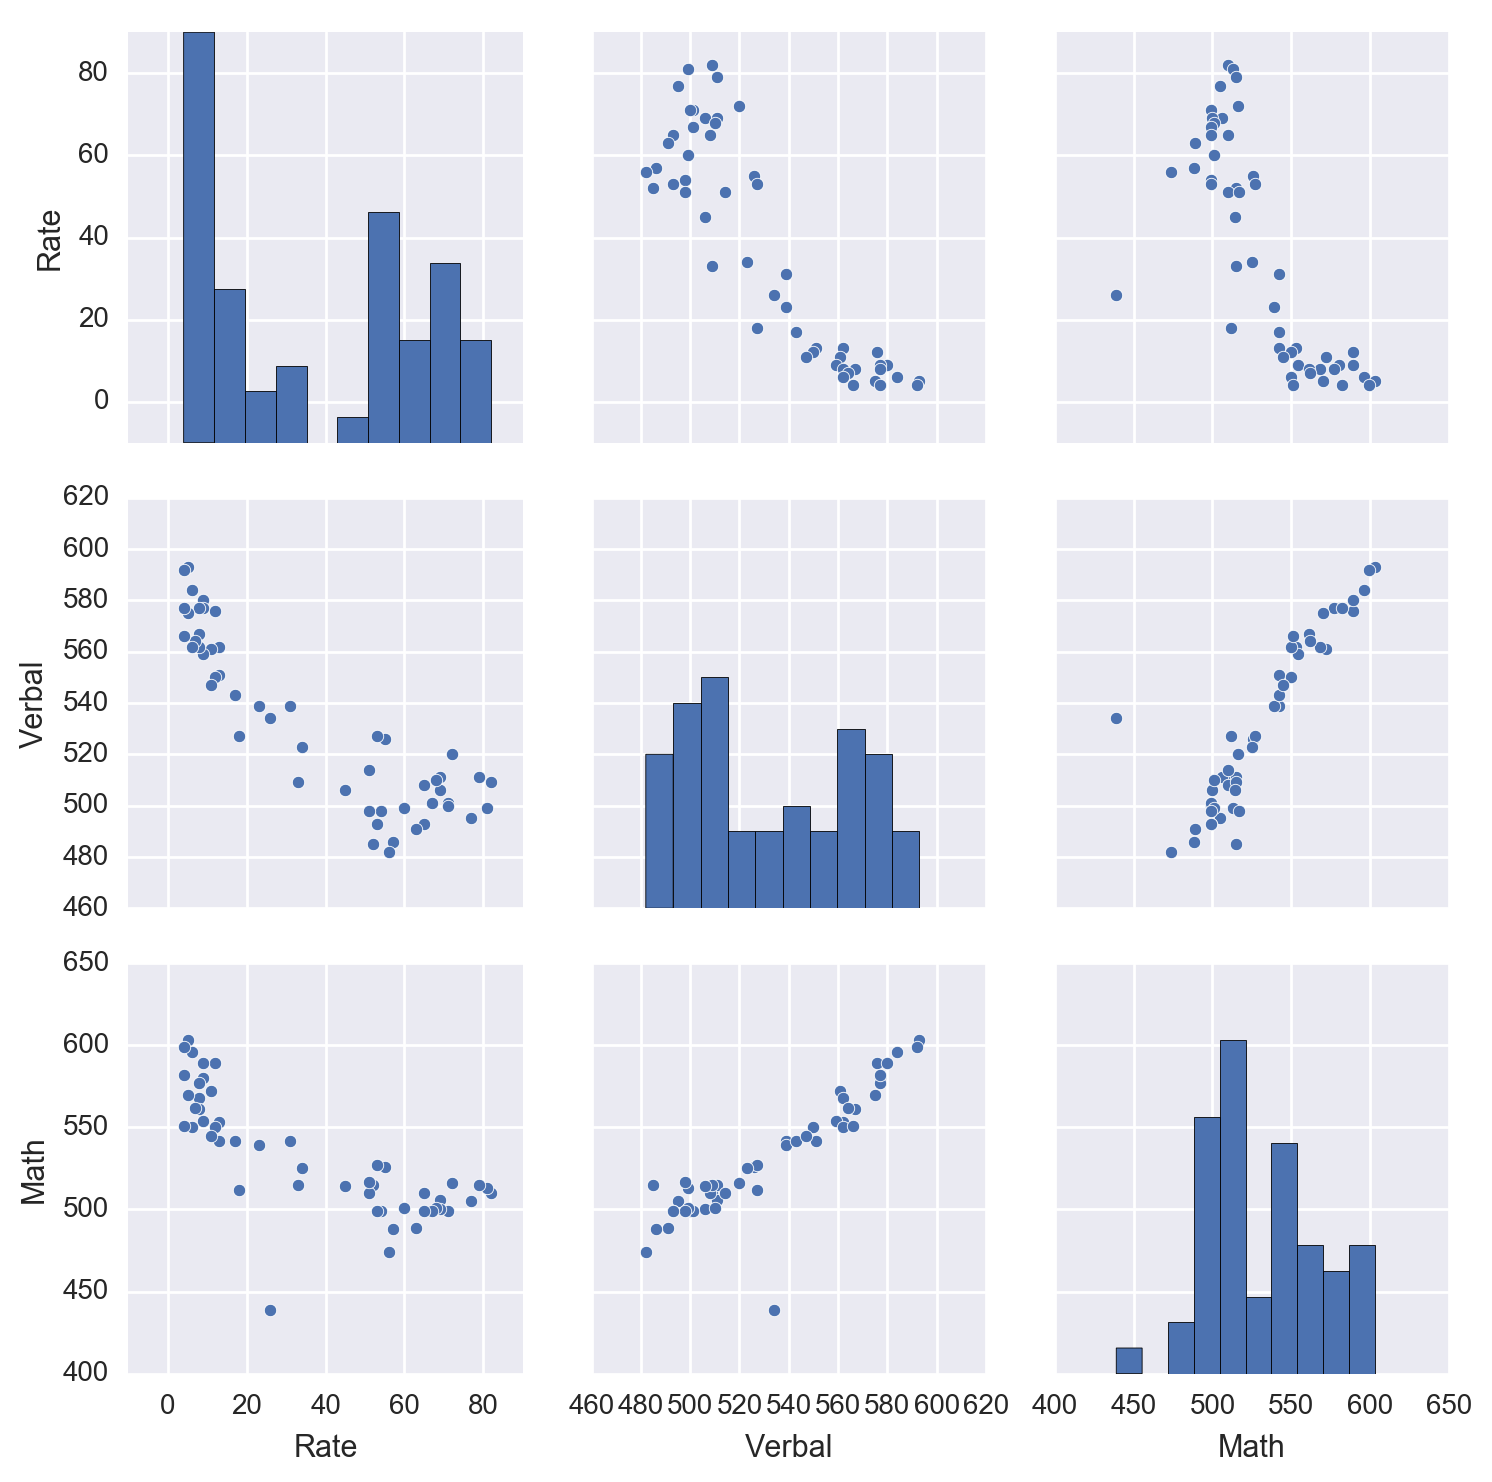

In [11]:
sns.pairplot(df)

#There seems to be a high correlation betweens grades in Math and Verbal.
#Rates are negatively correlated to both subjects.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

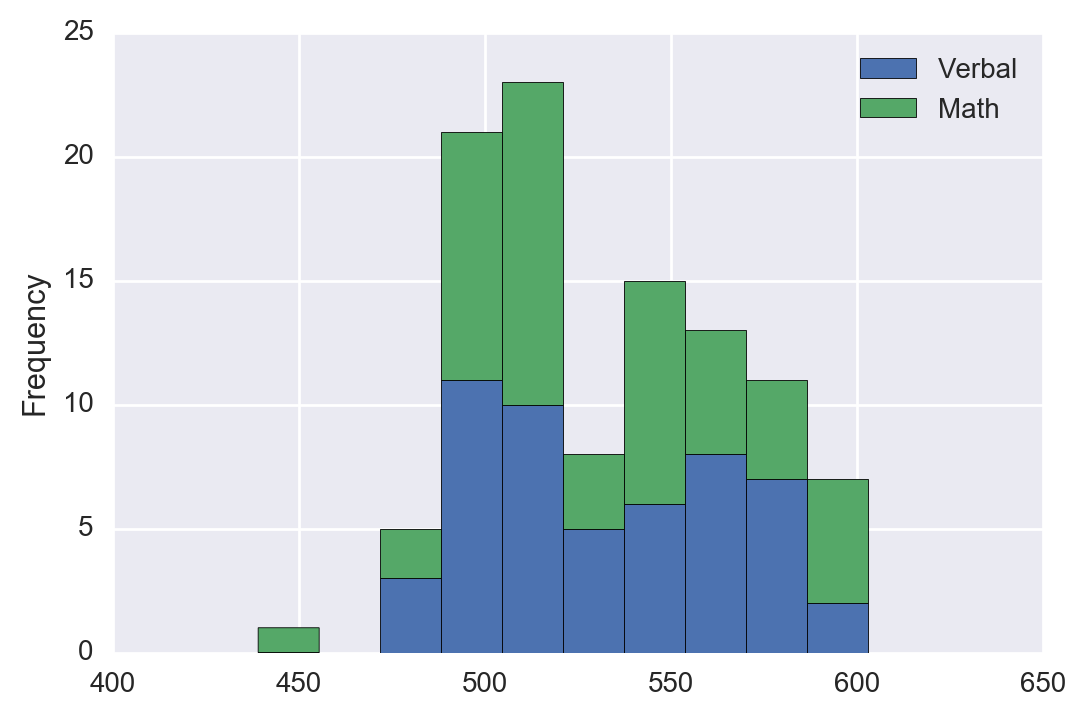

In [12]:
df[['Verbal','Math']].plot.hist(stacked=True);

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

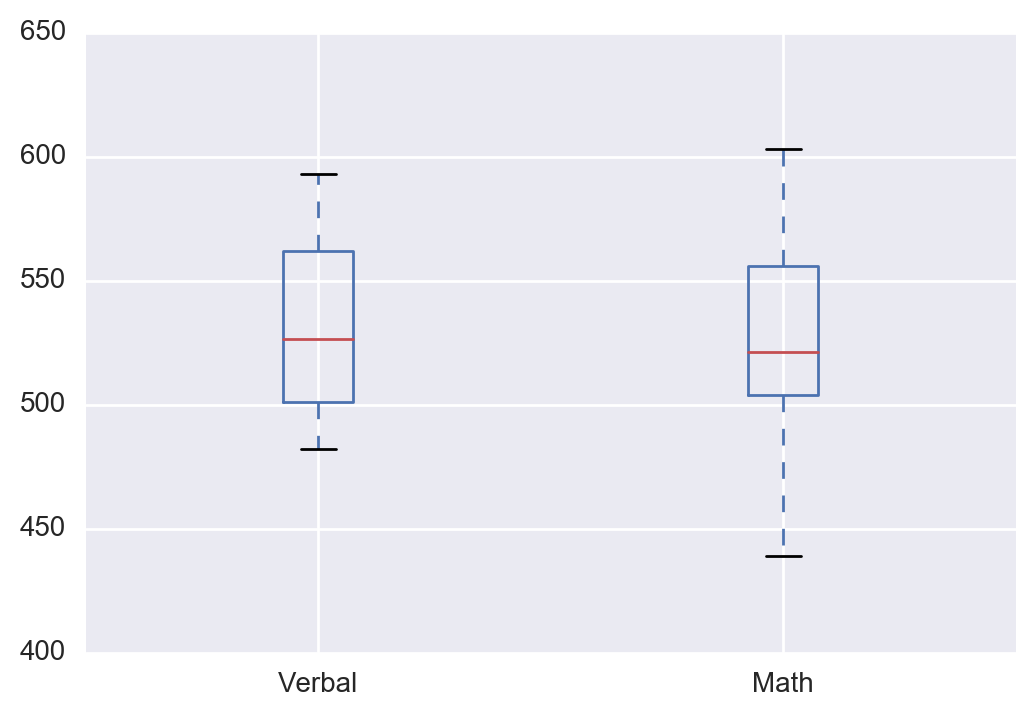

In [13]:
df[['Verbal','Math']].plot.box()

# plotting a box-plot of Rate on the same chart would not make sense, as the range of values would be completely different. It would need a re-scaling.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


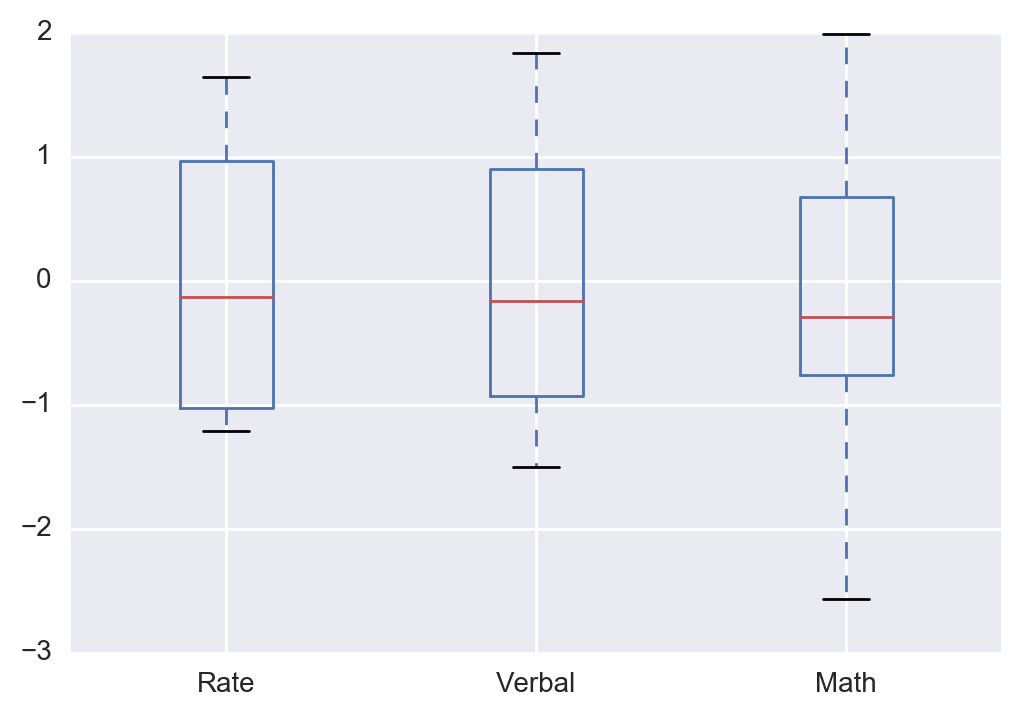

In [14]:
df_normed = (df[['Rate', 'Verbal','Math']] - df[['Rate', 'Verbal','Math']].mean()) /df[['Rate', 'Verbal','Math']].std()
df_normed.plot.box()



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [23]:
df.head()

print "Verbal mean =",df['Verbal'].mean()

df_states_over_avg_verbal = df[df['Verbal'] > df['Verbal'].mean()]
print "Here is the table displaying the states with Verbal scores greater than the average: "
print df_states_over_avg_verbal

print "Here is the list of states with Verbal scores greater than the average: "
df3 = df_states_over_avg_verbal['State'].tolist()
df3

print "len(df3) = ",len(df3)


Verbal mean = 532.019230769
Here is the table displaying the states with Verbal scores greater than the average: 
   State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
Here is the list of states with Verbal scores greater than the average: 
len(df3) =  24



### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

median of Verbal scores across states is =  526.5
Here is the list of states that have Verbal scores greater than the median :  19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
len list =  26


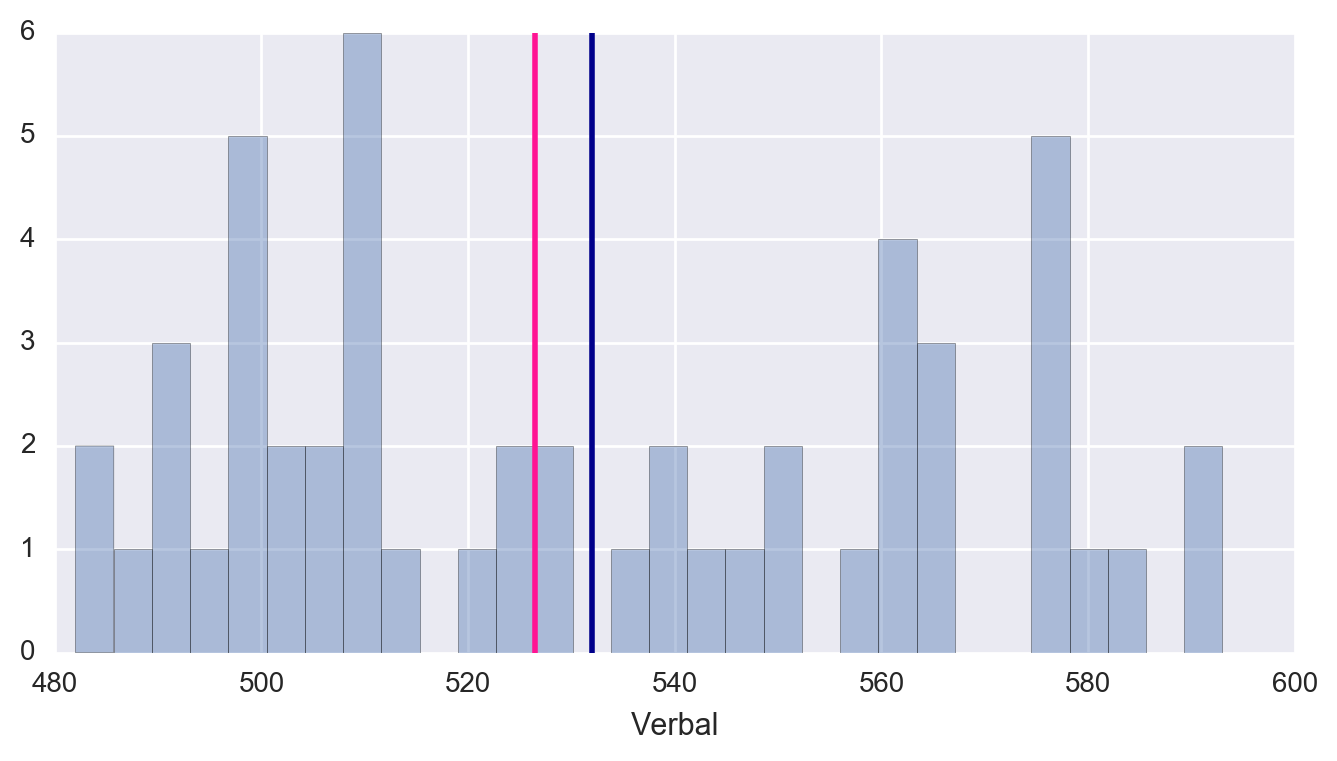

In [30]:
df.head()
print "median of Verbal scores across states is = ", df['Verbal'].median()
df_states_over_median_verbal = df[df['Verbal'] > df['Verbal'].median()]
print'Here is the list of states that have Verbal scores greater than the median : ',df_states_over_median_verbal.State
print 'len list = ', len(df_states_over_median_verbal.State)

# let's plot the distribution of the variable Verbal:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(df['Verbal'], bins=30, kde=False)


ax.axvline(x=np.mean(df['Verbal']), lw = 2, color = 'darkblue') 
ax.axvline(x=np.median(df['Verbal']), lw = 2, color = 'deeppink') 
plt.show()

# After plotting, we can see that the distribution has nearly no skew, meaning that median an mean are nearly the same
# mean is in darkblue, and median in pink
# this is why we have very similar results for the 2 last questions.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
df['Verbal - Math'] = df.Verbal - df.Math
df.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
#1. States with max of Verbal - Math

df_sorted_by_verbal_minus_math = df.sort('Verbal - Math',ascending = False)[['State','Verbal - Math']][:10]
df_sorted_by_verbal_minus_math['index'] = np.arange(1,len(df_sorted_by_verbal_minus_math)+1)
df_sorted_by_verbal_minus_math.set_index(['index'],drop = True,inplace = True)

print "\nTop 3 States with the highest Verbal - Math difference are the following : \n\n",df_sorted_by_verbal_minus_math[:3]




#2. States with min of Verbal - Math
df_sorted_by_math_minus_verbal = df.sort('Verbal - Math', ascending = True)[['State','Verbal - Math']][:10]

df_sorted_by_math_minus_verbal['index'] = np.arange(1,len(df_sorted_by_math_minus_verbal)+1)
df_sorted_by_math_minus_verbal.set_index(['index'],drop = True, inplace = True)

# Let's create a new column, that is Verbal - Math
df_verbal_minus_math = df_sorted_by_math_minus_verbal#+ df_verbal_minus_math['Math - Verbal']
df_verbal_minus_math['Math - Verbal'] = - df_sorted_by_math_minus_verbal['Verbal - Math']

df_verbal_minus_math = df_verbal_minus_math.drop('Verbal - Math', 1)
print '\n\nTop 3 States with the highest Math - Verbal difference are the following : \n\n',df_verbal_minus_math[:3]



    




Top 3 States with the highest Verbal - Math difference are the following : 

      State  Verbal - Math
index                     
1        OH             95
2        MS             15
3        WV             15


Top 3 States with the highest Math - Verbal difference are the following : 

      State  Math - Verbal
index                     
1        HI             30
2        CA             19
3        NJ             14


/Users/medhimugnier/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/medhimugnier/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [19]:
df.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


In [20]:
df[['Rate','Verbal','Math','Verbal - Math']].corr(method='pearson') 

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


In [21]:
# The correlation matrix shows that:
    # scores in Verbal and Math are highly correlated (meaning states often get approximately equal grades in Verbal and Math)
    # rates are negatively strongly correlated with both subjects, meaning that the higher is the rate, the lower will be the grades, and vice-versa. 

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [22]:
df.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


In [23]:
# 'count' describes the number of values found for each series. Here, they're equal to the number of rows = 52.
# 'mean' returns the average of all the values in the series. Verbal and Math are surprinsingly equal.
# 'std' quantifies the dispersion of all the recorded values. For instance, we have a wider array of data for Math scores than Verbal ones.
# 'min' is the minimum for all values contained in the given series. e.g. 482 is the minimal score that you can find accross the different states for the Verbal subject.
# '25%' is the first quartile. For the column Math, the 25% value is 504, meaning that 25% of the scores registered in Math are below 504.
# '50%' is the same concept.
# '75%' is the same concept.
# 'max' is the maximum for all values contained in the given series. e.g. 593 is the minimal score that you can find accross the different states for the Verbal subject.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [31]:
df.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [41]:
iowa_file = '/Users/medhimugnier/Desktop/DSI-SF-4/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [42]:
df_l = pd.read_csv(iowa_file)
df_l.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [26]:
df_l.info()

##Here is the description of the different datatypes included in the series:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [27]:
df_l.shape

(270955, 18)

In [28]:
df_l['Store Number'].value_counts().head()
# As shown below, each row does not represent a store's sales.

2633    2485
4829    2300
2512    1758
2572    1652
2190    1626
Name: Store Number, dtype: int64

In [29]:
df_l['Vendor Number'].value_counts().head()
# Same here, there is not one row per Vendor either.

260    46829
434    27090
65     25578
370    16932
115    15924
Name: Vendor Number, dtype: int64

In [30]:

#fig, ax = plt.subplots(1,1,figsize= (12,6))

#ax.hist(df_l['Date'].head(), alpha=0.4)
#plt.show()
df_l['Date'].dtype



dtype('O')

In [31]:
df_l.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [32]:
pivot = pd.pivot_table(data = df_l, columns = ['Date','Store Number','Item Number'] ,aggfunc = len)
pivot.head()

      Date        Store Number  Item Number
City  01/04/2016  2190          15606          1.0
                                18348          1.0
                                22786          1.0
                                25603          1.0
                                26586          1.0
dtype: float64

In [33]:
##### This dataframe is composed of 270,955 rows and 18 columns.
# Columns give information about the stores, the vendors, the type of alcohol and the volumes sold.
# Each row represents the quantity of a certain alcohol sold by a given bar at a given date.






<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [34]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [35]:
# Column Names look explicit, we do not have to worry about replacing them.
# Let's check the unique values for each column, then replace if necessary.


In [36]:
df_l['Store Number'].value_counts()
# data-type = int64. Looks fine.

2633    2485
4829    2300
2512    1758
2572    1652
2190    1626
2515    1565
2501    1553
2500    1521
2670    1506
2587    1481
2648    1445
2620    1438
2603    1407
2590    1356
2629    1335
2666    1319
2614    1306
2565    1303
2647    1297
2616    1288
2619    1261
2561    1250
4129    1247
2623    1235
2552    1201
2625    1183
3773    1176
2506    1174
4167    1142
3952    1140
        ... 
5033       5
4121       5
5139       5
4990       5
5229       5
5189       5
5233       4
4335       4
5232       4
4954       4
4855       4
5208       4
4737       4
5234       3
5193       3
5195       3
5201       3
5216       3
4834       3
5223       3
4939       3
5192       2
5130       2
5218       2
4776       2
4567       2
4778       2
5053       1
9023       1
9018       1
Name: Store Number, dtype: int64

In [37]:
df_l['City'].value_counts()
# data-type = Object. Let's find out why.

DES MOINES         23724
CEDAR RAPIDS       18888
DAVENPORT          11580
WATERLOO            8425
COUNCIL BLUFFS      8060
SIOUX CITY          7992
IOWA CITY           7951
AMES                7548
WEST DES MOINES     7162
DUBUQUE             6915
CEDAR FALLS         5735
ANKENY              4836
MASON CITY          4191
BETTENDORF          3709
CORALVILLE          3490
MUSCATINE           3397
BURLINGTON          3144
CLINTON             3111
FORT DODGE          2989
WINDSOR HEIGHTS     2811
MARSHALLTOWN        2694
NEWTON              2544
STORM LAKE          2533
MARION              2489
URBANDALE           2438
OTTUMWA             2295
JOHNSTON            2141
ALTOONA             2113
CLEAR LAKE          2083
SPENCER             1910
                   ...  
BUSSEY                16
SCHALLER              15
DANVILLE              15
GOLDFIELD             15
VAN METER             15
WASHBURN              15
WALL LAKE             14
ALTA                  14
DOWS                  13


In [38]:
df_l[df_l.City == 'Carroll']
# 'Carroll' is a city from Iowa state.
# Let's uppercase the string, to give it the same appearance as the other cities.

df_l.City.replace('Carroll','CARROLL',inplace = True)
df_l.City.value_counts()

# Let's check if all cities are in uppercase, and replace them when they're not.
city_is_not_upper = df_l['City'] [df_l['City'].str.isupper() == False]
print "cities that are not upper",city_is_not_upper

# Let's convert all of them uppercased:
df_l.City = df_l.City.str.upper()
df_l[df_l.City.str.isupper()].shape
# It seems that all cities are uppercased now.

# Is there any null value?
df_l[df_l.City.isnull() == True]
## -> There is none, everything is fine for this series.

cities that are not upper 2862         Dubuque
2940       Northwood
3339         Dubuque
4012       Northwood
4333       Northwood
5340         Dubuque
6639       Urbandale
7101      Des Moines
9244      Des Moines
10464      Northwood
11119     Des Moines
11342         Inwood
14198         Inwood
14667      Urbandale
14751        Dubuque
15774      Northwood
16935      Urbandale
16969         Inwood
19043        Dubuque
19362      Northwood
20042      Northwood
20739     Des Moines
21325      Northwood
21353      Northwood
21577      Northwood
22662         Inwood
23027      Northwood
23168        Dubuque
24079        Dubuque
24189      Northwood
             ...    
252905     Urbandale
253490     Northwood
253758    Des Moines
254221    Des Moines
254328     Northwood
254764       Dubuque
255504     Northwood
256401    Des Moines
256563    Des Moines
256939       Dubuque
257129     Northwood
257430     Northwood
258415    Des Moines
258772    Des Moines
259055     Northwood
260629  

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)


In [52]:
df_l.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [39]:
df_l['Zip Code'].value_counts()
print "number of missing values in Zip Code : ",df_l['Zip Code'].isnull().sum()
# This series looks fine.

df_l['County Number'].value_counts()
print "number of missing values in County Number : ",df_l['County Number'].isnull().sum()
# This series looks fine.

df_l['County'].value_counts()
print "number of missing values in County : ",df_l['County'].isnull().sum()

df_l['Category'].value_counts()
print "number of missing values in Category : ",df_l['Category'].isnull().sum()

df_l['Category Name'].value_counts()
print "number of missing values in 'Category Name' : ",df_l['Category Name'].isnull().sum()

df_l['Vendor Number'].value_counts()
print "number of missing values in 'Vendor Number' : ",df_l['Vendor Number'].isnull().sum()

df_l['Item Number'].value_counts()
print "number of missing values in 'Item Number' : ",df_l['Item Number'].isnull().sum()

df_l['Item Description'].value_counts()
print "number of missing values in 'Item Description' : ",df_l['Item Description'].isnull().sum()

df_l['Bottle Volume (ml)'].value_counts()
print "number of missing values in 'Bottle Volume (ml)' : ",df_l['Bottle Volume (ml)'].isnull().sum()

df_l['State Bottle Cost'].value_counts()
print "number of missing values in 'State Bottle Cost' : ",df_l['State Bottle Cost'].isnull().sum()
  
df_l['State Bottle Retail'].value_counts()
print "number of missing values in 'State Bottle Retail' : ",df_l['State Bottle Retail'].isnull().sum()

df_l['Bottles Sold'].value_counts()
print "number of missing values in 'Bottles Sold' : ",df_l['Bottles Sold'].isnull().sum()

df_l['Sale (Dollars)'].value_counts()
print "number of missing values in 'Sale (Dollars)' : ",df_l['Sale (Dollars)'].isnull().sum()

df_l['Volume Sold (Liters)'].value_counts()
print "number of missing values in 'Volume Sold (Liters)' : ",df_l['Volume Sold (Liters)'].isnull().sum()

df_l['Volume Sold (Gallons)'].value_counts()
print "number of missing values in 'Volume Sold (Gallons)' : ",df_l['Volume Sold (Gallons)'].isnull().sum()







#Volume Sold (Gallons)


number of missing values in Zip Code :  0
number of missing values in County Number :  1077
number of missing values in County :  1077
number of missing values in Category :  68
number of missing values in 'Category Name' :  632
number of missing values in 'Vendor Number' :  0
number of missing values in 'Item Number' :  0
number of missing values in 'Item Description' :  0
number of missing values in 'Bottle Volume (ml)' :  0
number of missing values in 'State Bottle Cost' :  0
number of missing values in 'State Bottle Retail' :  0
number of missing values in 'Bottles Sold' :  0
number of missing values in 'Sale (Dollars)' :  0
number of missing values in 'Volume Sold (Liters)' :  0
number of missing values in 'Volume Sold (Gallons)' :  0


In [40]:
# Let's convert 'State Bottle Cost", "State Bottle Retail" and "Sale (Dollars)" to floats:
    # First, let's remove the "$" sign:
df_l['State Bottle Cost'] = df_l['State Bottle Cost'].str.replace("$"," ")
df_l['State Bottle Retail'] = df_l['State Bottle Retail'].str.replace("$"," ")
df_l['Sale (Dollars)'] = df_l['Sale (Dollars)'].str.replace("$"," ")

    # Second, let's convert these values to floats
df_l['State Bottle Cost'] = df_l['State Bottle Cost'].astype(float)
df_l['State Bottle Retail'] = df_l['State Bottle Retail'].astype(float)
df_l['Sale (Dollars)'] = df_l['Sale (Dollars)'].astype(float)

# Now that we've transformed some series datatypes, let's check which ones are still objects:
df_l.loc[:,df_l.dtypes == object].head()

# -> It seems that we've cleaned every type of data.




,Date,City,Zip Code,County,Category Name,Item Description
0,11/04/2015,SUMNER,50674,Bremer,APRICOT BRANDIES,Mr. Boston Apricot Brandy
1,03/02/2016,DAVENPORT,52807,Scott,BLENDED WHISKIES,Tin Cup
2,02/11/2016,CEDAR FALLS,50613,Black Hawk,STRAIGHT BOURBON WHISKIES,Jim Beam
3,02/03/2016,AMES,50010,Story,AMERICAN COCKTAILS,1800 Ultimate Margarita
4,08/18/2015,BELMOND,50421,Wright,VODKA 80 PROOF,Five O'clock Vodka


In [50]:
#df_l.head()
#number of missing values in Category :  68
#number of missing values in 'Category Name' :  632
#--> Let's try to figure out if we can retrieve the missing Category Names from the Category column itself.

#1. let's build the dataframe that has correspondances between the 2 columns:
matching_categories = df_l[['Category', 'Category Name']][df_l['Category'].notnull() & df_l['Category Name'].notnull()]
matching_categories

#2. let's see which MISSING data we have in Category Name, that is NOT null in Category:
missing_category_name = df_l['Category'][(df_l["Category Name"].isnull()) & (df_l["Category"].notnull())]
unique_missing_category_name = missing_category_name.unique()
unique_missing_category_name









array([ 1022200.,  1052100.,  1082100.,  1032100.,  1091100.,  1062500.,
        1091300.,  1082200.,  1062400.,  1011700.,  1092100.])

In [54]:
#3. let's see if these "Category" values have an equivalent as "Category Name"

l = []

for i in range(len(unique_missing_category_name)):
    l.append(matching_categories[matching_categories["Category"] == unique_missing_category_name[i] ])
    
print "l = ",l

# l is empty, meaning that amongst data that we do have in the Category column, none of them can help us fill in the Category column.



l =  [Empty DataFrame
Columns: [Category, Category Name]
Index: [], Empty DataFrame
Columns: [Category, Category Name]
Index: [], Empty DataFrame
Columns: [Category, Category Name]
Index: [], Empty DataFrame
Columns: [Category, Category Name]
Index: [], Empty DataFrame
Columns: [Category, Category Name]
Index: [], Empty DataFrame
Columns: [Category, Category Name]
Index: [], Empty DataFrame
Columns: [Category, Category Name]
Index: [], Empty DataFrame
Columns: [Category, Category Name]
Index: [], Empty DataFrame
Columns: [Category, Category Name]
Index: [], Empty DataFrame
Columns: [Category, Category Name]
Index: [], Empty DataFrame
Columns: [Category, Category Name]
Index: []]


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [ ]:
# First, let's retrieve the stores who were not open for the full 2015 year

df_l['Date'] = pd.to_datetime(df_l['Date'])  
df_l['Date'].dtype   

In [ ]:
def ran_whole_year(store_number):
    
    mask = (df_l['Date'] > '2015-6-1') & (df_l['Date'] <= '2015-9-10')
    twenty_fifteen_dates = df_l.loc[mask]
    active_one_month_in_2015 = twenty_fifteen_dates[["Store Number"]].values

    if store_number not in active_one_month_in_2015:
        return 'inactive in 2015'
    
    else:
        # if the store has run at least once during year2015, this will retrieve all rows during this period of time:
        store_dates = twenty_fifteen_dates.Date[twenty_fifteen_dates['Store Number'] == store_number]
        store_dates_months = store_dates.map(lambda x: x.month)
        store_dates_months_unique = store_dates_months.unique()
        df_l["unique months in 2015"][df_l["Store Number"] == store_number] = store_dates_months_unique 
    
        if len(store_dates_months_unique) == 12:
            return 'yes'
        else:
            return 'no'

    
df_l["Ran every month of 2015?"] = df_l["Store Number"].map(ran_whole_year)
df_l.head(5)
       

In [ ]:
# we'll try to implement a plan only for stores who were opened in 2015.

# For these stores, the column "unique months in 2015" tells us the months they've been active.
# By calculating the length of these, we can easily tell what would have been their profit and benefits on the year scale.

def new_yearly_profit(store_number):
    
    #list of  stores that were not opened every single month of 2015:
    didnot_open_fully = df_l['Store Number'][df_l["Ran every month of 2015?"] == 'no']
    unique_stores_didnot_open_fully = didnot_open_fully.unique()
      
    if store_number not in unique_stores_didnot_open_fully:
        return "None"
    else:
        initial_sales = df_l["Sale (Dollars)"][df_l["Store Number"] == store_number].sum()
        number_of_active_months = len(df_l["unique months in 2015"][df_l["Store Number"] == store_number])
        avg_sales_per_month = initial_sales/number_of_active_months
        yearly_expected = 12 * avg_sales_per_month

        return yearly_expected

#Based on the new_yearly_profit function, let's create a new column "Yearly Expected"
df_l["Yearly Expected"] = df_l["Store Number"].map(new_yearly_profit)

#Finally, let's add a column "Yearly Profit (Cleaned)", that picks one of the two following columns:
# 1. "Sale (Dollars)"
#or
# 2. "Yearly Expected"

def calculating yearly_profit_cleaned(store_number):
    if ...
    df_l["Yearly Profit (Cleaned)"]
# to be finished


In [ ]:
# active_all_year function lets you know if a given store has been active all year long
def active_all_year(store_input_dates):
    active_months = []
    for i in store_input_dates:
    
        if i.month not in active_months:
            active_months.append(i.month)
        
        if len(active_months_alpha) < 12:
            return False
        else:
            return True
        

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [ ]:
dates_2015 = df_l[(df_l.Date > "2015-01-01") & (df_l.Date<"2015-12-31")]


s = dates_2015.groupby(['Store Number'])['Sale (Dollars)'].sum()
s.reset_index()

print pd.DataFrame(s)


### 10.2 Calculate the profit each store is making in 2015.


In [ ]:
# profit = sales - expenses
#expenses = 'State Bottle Cost'*'Bottles Sold'
dates_2015['Yearly Profit'] = df_l['Sale (Dollars)'] - (df_l['State Bottle Cost']*df_l['Bottles Sold'])


year_profit = dates_2015.groupby(['Store Number'])['Yearly Profit'].sum()
year_profit.reset_index()

print pd.DataFrame(year_profit)


### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [ ]:
dates_2015.head()
dates_2015['Profit per Gallon'] = dates_2015['Yearly Profit'] / dates_2015['Volume Sold (Gallons)']

dates_2015.head()

iowa_counties = dates_2015[dates_2015['County Number'] == 48.0]
iowa_cities = iowa_counties.groupby(["City"])["Profit per Gallon"].sum()
iowa_most_profitable_cities = iowa_cities.sort_values(ascending=False)
iowa_most_profitable_cities.reset_index()

"Below are the top most profitable cities per gallon in Iowa : ", iowa_most_profitable_cities

#most_profitable_iowa_counties = dates_2015 ['County Number'] [dates_2015['County Number'] == 48.0].sort(ascending = False)
# how do I select the rows where county number is 48 plus the rows where county is iowa?

### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [35]:
initial_catg = df_l['Category Name'].unique()
initial_catg

array(['APRICOT BRANDIES', 'BLENDED WHISKIES', 'STRAIGHT BOURBON WHISKIES',
       'AMERICAN COCKTAILS', 'VODKA 80 PROOF', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES', 'IMPORTED VODKA',
       'CINNAMON SCHNAPPS', 'SINGLE BARREL BOURBON WHISKIES',
       'PEPPERMINT SCHNAPPS', 'VODKA FLAVORED', '100 PROOF VODKA',
       'DISTILLED SPIRITS SPECIALTY', 'TEQUILA', 'TENNESSEE WHISKIES',
       'WHISKEY LIQUEUR', 'MISC. AMERICAN CORDIALS & LIQUEURS',
       'APPLE SCHNAPPS', 'CHERRY BRANDIES',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'IMPORTED DRY GINS',
       'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES', 'SINGLE MALT SCOTCH',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'SPICED RUM', 'CREAM LIQUEURS',
       'SCOTCH WHISKIES', 'IMPORTED VODKA - MISC', 'IRISH WHISKIES',
       'FLAVORED RUM', 'IMPORTED GRAPE BRANDIES', 'SPEARMINT SCHNAPPS',
       'RASPBERRY SCHNAPPS', 'TRIPLE SEC', 'AMERICAN AMARETTO',
       'IMPORTED SCHNAPPS', 'STRAIGHT RYE WHISKIES', '

In [53]:
df_l.head()
initial_catg = df_l['Category Name'].unique()

categories_dict = {}
for i in range(len(initial_catg)):
    if 'BRANDIES' in str(initial_catg[i]):
        categories_dict['BRANDIES']=initial_catg[i]
    if 'BRANDIES' in str(initial_catg[i]):
        categories_dict['BRANDIES']=initial_catg[i]
    elif 'WHISKIES' in str(initial_catg[i]):
        categories_dict['WHISKIES']=initial_catg[i]
    elif 'SCOTCH' in str(initial_catg[i]):
        categories_dict['LIQUEUR']=initial_catg[i]
    elif 'VODKA' in str(initial_catg[i]):    
        categories_dict['VODKA']=initial_catg[i]
    elif 'GINS' in str(initial_catg[i]):
        categories_dict['GINS']=initial_catg[i]
    elif 'COCKTAILS' in str(initial_catg[i]):
        categories_dict['COCKTAILS']=initial_catg[i]
    elif 'SCHNAPPS' in str(initial_catg[i]):
        categories_dict['SCHNAPPS']=initial_catg[i]
    elif 'TEQUILA' in str(initial_catg[i]):
        categories_dict['TEQUILA']=initial_catg[i]
    elif 'SPIRITS' in str(initial_catg[i]):
        categories_dict['SPIRITS']=initial_catg[i]
    elif 'SPECIALTY' in str(initial_catg[i]):
        categories_dict['LIQUEUR']=initial_catg[i]
    elif 'RUM' in str(initial_catg[i]):
        categories_dict['RUM']=initial_catg[i]
    elif 'AMARETTO' in str(initial_catg[i]):
        categories_dict['AMARETTO']=initial_catg[i]
    else:
        categories_dict['OTHER']=initial_catg[i]


categories_dict


{'AMARETTO': 'AMARETTO - IMPORTED',
 'BRANDIES': 'PEACH BRANDIES',
 'COCKTAILS': 'AMERICAN COCKTAILS',
 'GINS': 'AMERICAN SLOE GINS',
 'LIQUEUR': 'BUTTERSCOTCH SCHNAPPS',
 'OTHER': 'HIGH PROOF BEER - AMERICAN',
 'RUM': 'BARBADOS RUM',
 'SCHNAPPS': 'TROPICAL FRUIT SCHNAPPS',
 'SPIRITS': 'DISTILLED SPIRITS SPECIALTY',
 'TEQUILA': 'TEQUILA',
 'VODKA': 'LOW PROOF VODKA',
 'WHISKIES': 'CORN WHISKIES'}

In [47]:
type(df_l['Category Name'])

pandas.core.series.Series

In [ ]:
    if 'BRANDIES' in initial_catg[i]:
        categories_dict['BRANDIES']=initial_catg[i]
    elif 'WHISKIES' in initial_catg[i]:
        categories_dict['WHISKIES']=initial_catg[i]
    elif 'SCOTCH' in initial_catg[i]:
        categories_dict['LIQUEUR']=initial_catg[i]
    else:
        categories_dict['OTHER']=initial_catg[i]    
    
    elif 'VODKA' in item:    
        categories_dict['VODKA']=item
    elif 'GINS' in item:
        categories_dict['GINS']=item
    elif 'COCKTAILS' in item:
        categories_dict['COCKTAILS']=item
    elif 'SCHNAPPS' in item:
        categories_dict['SCHNAPPS']=item
    elif 'TEQUILA' in item:
        categories_dict['TEQUILA']=item
    elif 'SPIRITS' in item:
        categories_dict['SPIRITS']=item
    elif 'SPECIALTY' in item:
        categories_dict['LIQUEUR']=item
    elif 'RUM' in item:
        categories_dict['RUM']=item
    elif 'AMARETTO' in item:
        categories_dict['AMARETTO']=item
    else:
        categories_dict['OTHER']=item


### 10.5 Do relationships exist between the broader liquor type and profit?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.
